In [1]:
#In this Notebook, three features are preprocessed: heart rate, acceleration, and number of steps.
#Extract features from it and store them in a "feature" data frame containing 31 object features.
import os
import numpy as np
import pandas as pd
import seaborn as sns
from random import sample
import statistics as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#load data
subject_labels=[]
for file in (os.listdir("Data/labels/")):
    subject_labels.append(os.path.join("Data/labels/",file))
    subject_labels=sorted(subject_labels)
    
subject_heart_rate=[]
for file in os.listdir("Data/heart_rate"):
    subject_heart_rate.append(os.path.join("Data/heart_rate",file))

subject_steps=[]
for file in os.listdir("Data/steps"):
    subject_steps.append(os.path.join("Data/steps",file))

subject_motion=[]
for file in os.listdir("Data/motion"):
    subject_motion.append(os.path.join("Data/motion",file))

In [3]:
#Sliding window creation
def get_window(w_size,signal,n_labels):
    time = signal["Time"]
    f_list=[]
    
    for i in range(n_labels):
        a = w_size*(1+i)
        b = w_size*(2+i)

        idx=[]
        for t in time:
            if t>a and t<b:
                idx.append(True)
            else:
                idx.append(False)
        
        f = signal[idx]
        f_list.append(f)
    
    return f_list

In [4]:
#Feature extraction
#start_time = time.time()

df = []
for a, (i,j,k,l) in  enumerate(zip(subject_labels,subject_heart_rate,subject_steps,subject_motion)):
    w_size = 30
    
    
    #labels
    labels = pd.read_csv(i, delimiter=' ')
    labels.columns = ["Time","labels"]
    n_labels = len(labels)
    #Binary label
    labels_bin = labels.replace(to_replace =[-1,5],  value =0) 
    labels_bin = labels_bin.replace(to_replace =[2,3,4],  value =1)    
    #0:aweak; 1:sleep
    bin_labels = labels_bin["labels"]
    #Multiple label
    labels_multi = labels.replace(to_replace =[-1],  value =0) 
    labels_multi = labels_multi.replace(to_replace =[4],  value =3) 
    #Multi-label 0-very light sleep 1,2,3-deep sleep 5-light sleep (rem)
    multi_labels = labels_multi["labels"]
    #ID_LIST
    labels = labels["labels"]
    id_list = [a]*len(labels)
    
    #Heart rate
    heart_rate = pd.read_csv(j)
    heart_rate.columns = ["Time","hr"]
    heart_rate=heart_rate[heart_rate["Time"]>0]
    signal = heart_rate
    f_list = get_window(w_size,signal,n_labels)
    fc_mean_list = []
    fc_min_list = []
    fc_max_list = []
    for f in f_list:
        fc_mean_list.append(round(f['hr'].mean(),2))
        fc_min_list.append(round(f['hr'].min(),2))
        fc_max_list.append(round(f['hr'].max(),2))
    feat1 = fc_min_list
    feat2 = fc_max_list
    feat3 = fc_mean_list
    
    #ACCELERACION
    mo=pd.read_csv(l, delimiter=' ')
    mo.columns=["Time","Ac_x","Ac_y","Ac_z"]
    mo_t=mo[mo['Time']>0]
    mo_t=mo_t.sample(frac=.1)
    mo_t=mo_t.sort_values('Time')
    raiz_movto= np.sqrt(mo_t.Ac_x**2 + mo_t.Ac_y**2 + mo_t.Ac_z**2)
    mo_t['Raiz_movto'] = raiz_movto
    signal=mo_t
    acc_list= get_window(w_size,signal,n_labels)
    mean_sqrt_acc=[]
    min_accx=[]
    max_accx=[]
    mean_accx=[]
    min_accy=[]
    max_accy=[]
    mean_accy=[]
    min_accz=[]
    max_accz=[]
    mean_accz=[]
    for f in acc_list:
        mean_sqrt_acc.append(round(f['Raiz_movto'].mean(),2))
        min_accx.append(round(f['Ac_x'].min(),2))
        max_accx.append(round(f['Ac_x'].max(),2))
        mean_accx.append(round(f['Ac_x'].mean(),2))
        min_accy.append(round(f['Ac_y'].min(),2))
        max_accy.append(round(f['Ac_y'].max(),2))
        mean_accy.append(round(f['Ac_y'].mean(),2))
        min_accz.append(round(f['Ac_z'].min(),2))
        max_accz.append(round(f['Ac_z'].max(),2))
        mean_accz.append(round(f['Ac_z'].mean(),2))
    feat4=mean_sqrt_acc
    feat5=min_accx
    feat6=max_accx
    feat7=mean_accx
    feat8=min_accy
    feat9=max_accy
    feat10=mean_accy
    feat11=min_accz
    feat12=max_accz
    feat13=mean_accz

    datum = {'Min_hr': feat1, "Max_hr": feat2,"Mean_hr":feat3,'Men_acc_sqrt': feat4,
             "Min_acc_x": feat5,"Max_acc_x":feat6,"Mean_acc_x": feat7,
             "Min_acc_y": feat8,"Max_acc_y":feat9,"Mean_acc_y":feat10,
             "Min_acc_z": feat11,"Max_acc_z":feat12,"Mean_acc_z":feat13,
            "Binary label":bin_labels,"Multiple label":multi_labels, "ID":id_list}
    
    datum_subject = pd.DataFrame(data=datum)
    df.append(datum_subject)

#print ("My program took", time.time() - start_time, "to run")

In [5]:
print(len(df))

31


In [15]:
df

[     Min_hr  Max_hr  Mean_hr  Men_acc_sqrt  Min_acc_x  Max_acc_x  Mean_acc_x  \
 0      49.0    54.0    50.83           1.0       0.40       0.41         0.4   
 1      50.0    54.0    52.40           1.0       0.40       0.41         0.4   
 2      53.0    54.0    53.83           1.0       0.39       0.41         0.4   
 3      56.0    68.0    60.50           1.0       0.40       0.40         0.4   
 4      51.0    52.0    51.67           1.0       0.40       0.40         0.4   
 ..      ...     ...      ...           ...        ...        ...         ...   
 946     NaN     NaN      NaN           NaN        NaN        NaN         NaN   
 947     NaN     NaN      NaN           NaN        NaN        NaN         NaN   
 948    69.0    69.0    69.00           NaN        NaN        NaN         NaN   
 949     NaN     NaN      NaN           NaN        NaN        NaN         NaN   
 950     NaN     NaN      NaN           NaN        NaN        NaN         NaN   
 
      Min_acc_y  Max_acc_y

In [7]:
#Since there are some NaN values, the following function is used to clear the data frame of NaN and infinite values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    
    return df[indices_to_keep].astype(np.float64)

In [8]:
clean_df = clean_dataset(pd.concat(df))

In [9]:
clean_df.describe()

,Min_hr,Max_hr,Mean_hr,Men_acc_sqrt,Min_acc_x,Max_acc_x,Mean_acc_x,Min_acc_y,Max_acc_y,Mean_acc_y,Min_acc_z,Max_acc_z,Mean_acc_z,Binary label,Multiple label,ID
count,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000,25890.000000
mean,62.690035,66.179606,64.335415,0.997801,-0.156940,-0.093668,-0.124095,-0.136897,-0.042618,-0.088668,-0.495738,-0.412930,-0.458549,0.687215,2.514021,15.149285
std,9.713266,10.873132,10.071347,0.005517,0.376243,0.375306,0.354912,0.490459,0.500454,0.468479,0.643889,0.659012,0.636910,0.463636,1.504206,9.213939
min,41.000000,42.000000,41.170000,0.960000,-2.780000,-0.950000,-0.980000,-2.790000,-1.000000,-1.000000,-3.240000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,55.000000,59.000000,57.000000,0.990000,-0.420000,-0.360000,-0.380000,-0.490000,-0.410000,-0.430000,-0.920000,-0.890000,-0.900000,0.000000,2.000000,7.000000
50%,62.000000,66.000000,64.000000,1.000000,-0.240000,-0.180000,-0.210000,-0.130000,-0.030000,-0.070000,-0.820000,-0.780000,-0.800000,1.000000,2.000000,15.000000
75%,68.000000,73.000000,70.500000,1.000000,0.080000,0.150000,0.100000,0.200000,0.270000,0.220000,-0.240000,0.010000,-0.120000,1.000000,3.000000,23.000000
max,127.000000,130.000000,128.570000,1.100000,0.830000,3.250000,0.840000,0.990000,4.300000,0.990000,1.000000,2.170000,1.010000,1.000000,5.000000,30.000000


In [10]:
#The extracted feature set is saved in the dataframe
clean_df.to_csv('features.csv', header=True, index=False)

In [11]:
#Dataframe visualization
rows, columns = clean_df.shape #Forma de la BD
print ('The database has', rows,'rows and',columns,'columns\n')
print('Number of different values for each attribute:')
print(clean_df.nunique(),'\n')
print('Number of Null values:')
print(clean_df.isnull().sum(),'\n')
print('Number of NaN values:')
print(clean_df.isna().sum(),'\n')
print('Statistical description:')
print(clean_df.describe().round(2),'\n')

The database has 25890 rows and 16 columns

Number of different values for each attribute:
Min_hr             72
Max_hr             80
Mean_hr           919
Men_acc_sqrt       13
Min_acc_x         236
Max_acc_x         250
Mean_acc_x        177
Min_acc_y         274
Max_acc_y         292
Mean_acc_y        200
Min_acc_z         300
Max_acc_z         249
Mean_acc_z        202
Binary label        2
Multiple label      5
ID                 31
dtype: int64 

Number of Null values:
Min_hr            0
Max_hr            0
Mean_hr           0
Men_acc_sqrt      0
Min_acc_x         0
Max_acc_x         0
Mean_acc_x        0
Min_acc_y         0
Max_acc_y         0
Mean_acc_y        0
Min_acc_z         0
Max_acc_z         0
Mean_acc_z        0
Binary label      0
Multiple label    0
ID                0
dtype: int64 

Number of NaN values:
Min_hr            0
Max_hr            0
Mean_hr           0
Men_acc_sqrt      0
Min_acc_x         0
Max_acc_x         0
Mean_acc_x        0
Min_acc_y         0
Ma

1.0    17792
0.0     8098
Name: Binary label, dtype: int64
2.0    12486
5.0     5544
3.0     3545
0.0     2554
1.0     1761
Name: Multiple label, dtype: int64


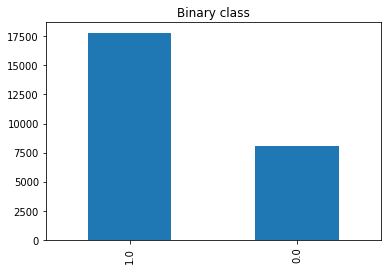

<Figure size 432x288 with 0 Axes>

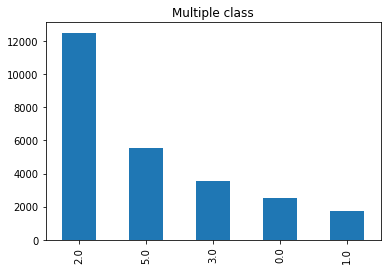

In [12]:
#Label distribution in the data set
clean_df['Binary label'].value_counts().plot.bar(title="Binary class")
plt.figure()
print(clean_df["Binary label"].value_counts() )

plt.figure()
clean_df['Multiple label'].value_counts().plot.bar(title="Multiple class")
print(clean_df["Multiple label"].value_counts() )
